# Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

# EDA

#### Exploaring Training Data

In [2]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/train.csv')

In [3]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [4]:
train.shape

(4000000, 56)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int64
 1   Elevation                           int64
 2   Aspect                              int64
 3   Slope                               int64
 4   Horizontal_Distance_To_Hydrology    int64
 5   Vertical_Distance_To_Hydrology      int64
 6   Horizontal_Distance_To_Roadways     int64
 7   Hillshade_9am                       int64
 8   Hillshade_Noon                      int64
 9   Hillshade_3pm                       int64
 10  Horizontal_Distance_To_Fire_Points  int64
 11  Wilderness_Area1                    int64
 12  Wilderness_Area2                    int64
 13  Wilderness_Area3                    int64
 14  Wilderness_Area4                    int64
 15  Soil_Type1                          int64
 16  Soil_Type2                          

In [6]:
train.describe().round(3)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,...,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000,4000000.000
mean,1999999.500,2980.192,151.586,15.098,271.315,51.663,1766.642,211.838,221.061,140.811,...,0.037,0.038,0.012,0.016,0.011,0.012,0.041,0.039,0.032,1.771
std,1154700.683,289.048,109.961,8.547,226.550,68.216,1315.610,30.760,22.231,43.699,...,0.190,0.191,0.109,0.126,0.103,0.110,0.198,0.194,0.175,0.894
min,0.000,1773.000,-33.000,-3.000,-92.000,-317.000,-287.000,-4.000,49.000,-53.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,999999.750,2760.000,60.000,9.000,110.000,4.000,822.000,198.000,210.000,115.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,1999999.500,2966.000,123.000,14.000,213.000,31.000,1436.000,218.000,224.000,142.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
75%,2999999.250,3217.000,247.000,20.000,361.000,78.000,2365.000,233.000,237.000,169.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
max,3999999.000,4383.000,407.000,64.000,1602.000,647.000,7666.000,301.000,279.000,272.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000


In [12]:
train.columns[train.isna().any()]

Index([], dtype='object')

In [13]:
train.nunique()

Id                                    4000000
Elevation                                2525
Aspect                                    440
Slope                                      68
Horizontal_Distance_To_Hydrology         1636
Vertical_Distance_To_Hydrology            916
Horizontal_Distance_To_Roadways          7760
Hillshade_9am                             301
Hillshade_Noon                            221
Hillshade_3pm                             326
Horizontal_Distance_To_Fire_Points       8112
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7                        

In [14]:
train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

#### Eploaring Testing Data

In [15]:
test = pd.read_csv('/kaggle/input/tabular-playground-series-dec-2021/test.csv')

In [16]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,4000000,2763,78,20,377,88,3104,218,213,195,...,0,0,0,0,0,0,0,0,0,0
1,4000001,2826,153,11,264,39,295,219,238,148,...,0,0,0,0,0,0,0,0,0,0
2,4000002,2948,57,19,56,44,852,202,217,163,...,0,0,1,0,0,0,0,0,0,0
3,4000003,2926,119,6,158,134,2136,234,240,142,...,0,0,0,0,0,0,0,0,0,0
4,4000004,2690,10,4,38,108,3589,213,221,229,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test.shape

(1000000, 55)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 55 columns):
 #   Column                              Non-Null Count    Dtype
---  ------                              --------------    -----
 0   Id                                  1000000 non-null  int64
 1   Elevation                           1000000 non-null  int64
 2   Aspect                              1000000 non-null  int64
 3   Slope                               1000000 non-null  int64
 4   Horizontal_Distance_To_Hydrology    1000000 non-null  int64
 5   Vertical_Distance_To_Hydrology      1000000 non-null  int64
 6   Horizontal_Distance_To_Roadways     1000000 non-null  int64
 7   Hillshade_9am                       1000000 non-null  int64
 8   Hillshade_Noon                      1000000 non-null  int64
 9   Hillshade_3pm                       1000000 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  1000000 non-null  int64
 11  Wilderness_Area1                    10

In [19]:
test.describe().round(3)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.00,1000000.000,1000000.00,1000000.000,1000000.000,...,1000000.00,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000,1000000.000
mean,4499999.500,2969.602,152.232,14.923,264.368,51.48,1713.508,211.66,221.476,139.861,...,0.03,0.043,0.041,0.012,0.016,0.011,0.012,0.043,0.040,0.033
std,288675.279,342.676,111.630,8.457,227.972,68.52,1374.922,31.28,21.952,45.398,...,0.17,0.204,0.197,0.110,0.125,0.103,0.109,0.204,0.196,0.178
min,4000000.000,1782.000,-33.000,-3.000,-136.000,-329.00,-264.000,1.00,53.000,-51.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4249999.750,2725.000,59.000,9.000,102.000,3.00,751.000,197.00,210.000,114.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,4499999.500,2968.000,124.000,14.000,206.000,31.00,1320.000,218.00,224.000,142.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,4749999.250,3245.000,251.000,20.000,356.000,78.00,2261.000,234.00,237.000,169.000,...,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,4999999.000,4359.000,400.000,63.000,1583.000,634.00,7653.000,296.00,276.000,270.000,...,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
test.columns[test.isna().any()]

Index([], dtype='object')

In [21]:
test.nunique()

Id                                    1000000
Elevation                                2488
Aspect                                    433
Slope                                      67
Horizontal_Distance_To_Hydrology         1612
Vertical_Distance_To_Hydrology            858
Horizontal_Distance_To_Roadways          7576
Hillshade_9am                             280
Hillshade_Noon                            218
Hillshade_3pm                             320
Horizontal_Distance_To_Fire_Points       7929
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7                        

In [22]:
test.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

# Data Preparation and Analysis

Drop Unneeded columns

In [24]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [25]:
FEATURES = [col for col in train.columns if col not in ['Id', 'Cover_Type']]
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [30]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

In [31]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,0,0,0,0,0
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,0,0,0,0,0
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,0,0,0,0,0
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,0,0,0,0,0
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.shape

(5000000, 54)

In [33]:
del df

In [34]:
cat_features

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [35]:
cont_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [37]:
train['Cover_Type'].value_counts()

Cover_Type
2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: count, dtype: int64

<Axes: xlabel='Cover_Type', ylabel='count'>

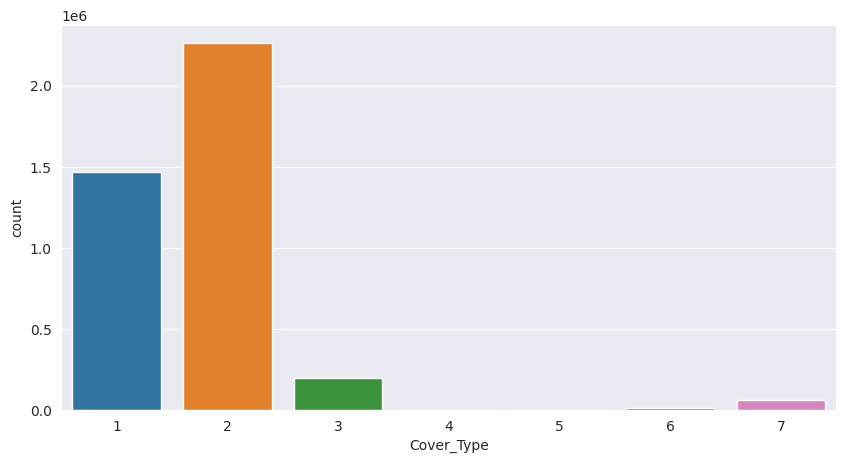

In [40]:
# count plot for the target variable
plt.figure(figsize=(10,5))
sns.countplot(x='Cover_Type', data=train)

**There is only 1 row of class 5**

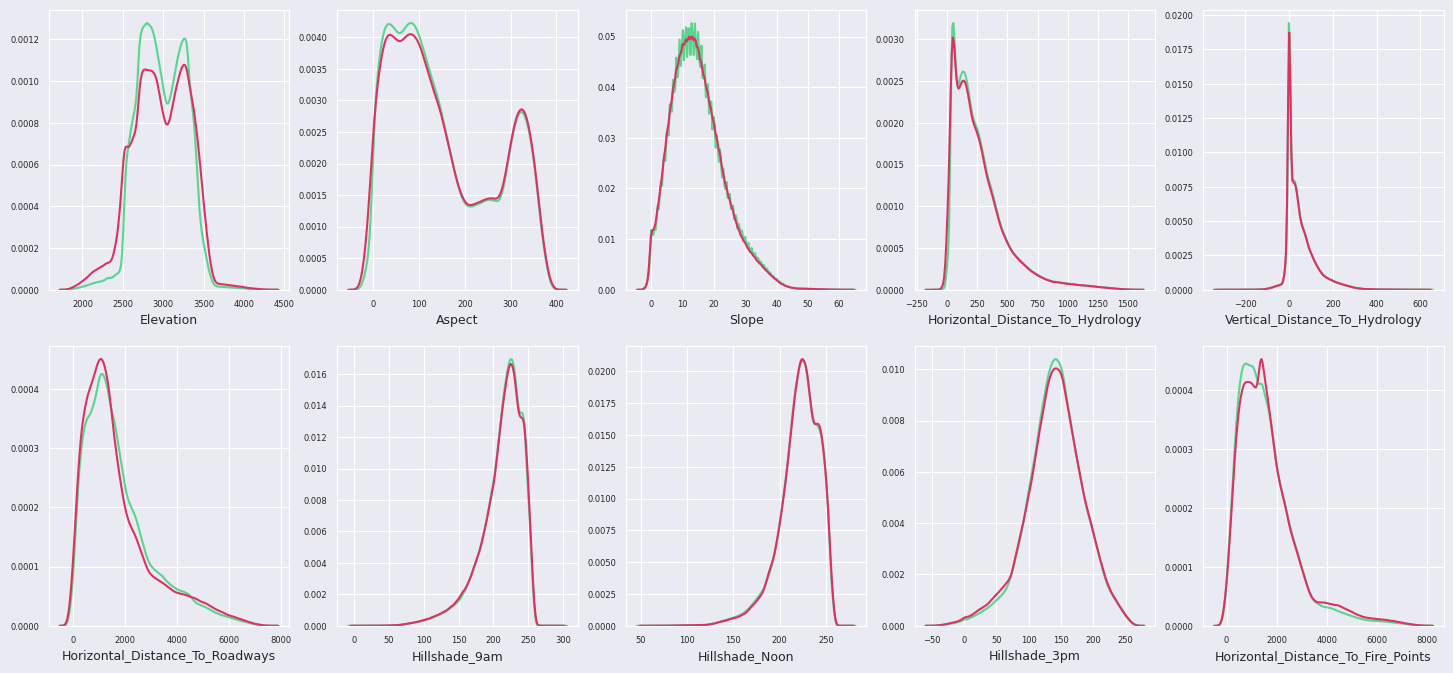

In [49]:
# distrbution of the continous features
ncols = 5 # Number of columns in the grid
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(nrows= nrows, ncols=ncols, figsize=(18,8), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#58D68D', label='Train data')
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#DE3163', label='Test data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=9)
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(5)
        axes[r, c].yaxis.offsetText.set_fontsize(5)
plt.show()

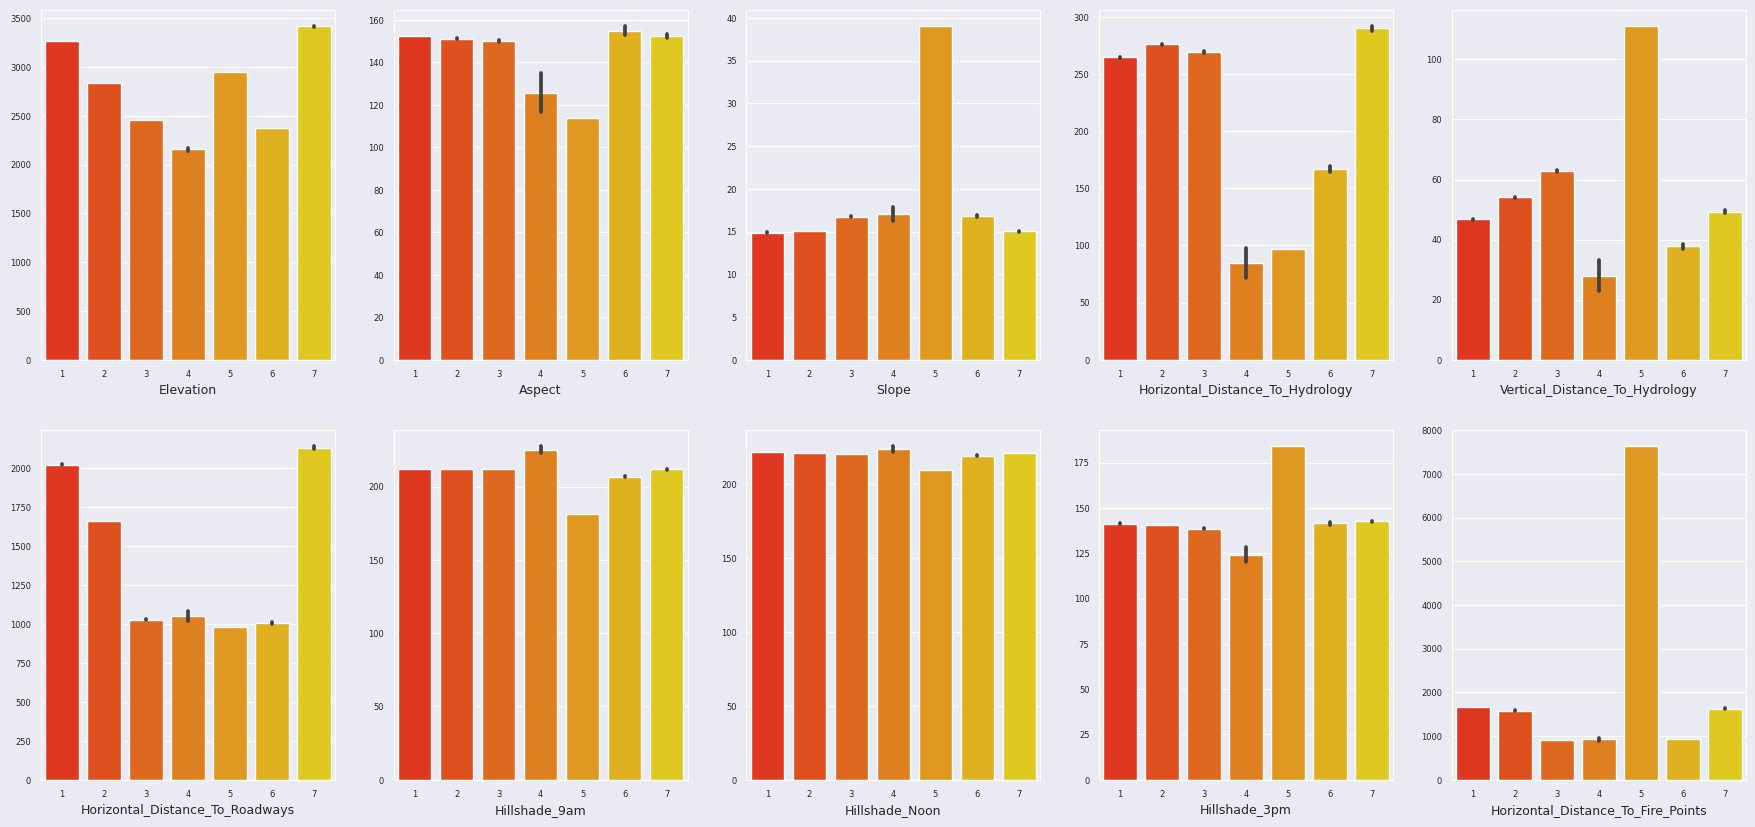

In [50]:
# barplot of the categorical features (y-axis) and target variable (x-axis)
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.barplot(x=train['Cover_Type'], y =train[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=9)
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(5)
        axes[r, c].yaxis.offsetText.set_fontsize(5)
plt.show()

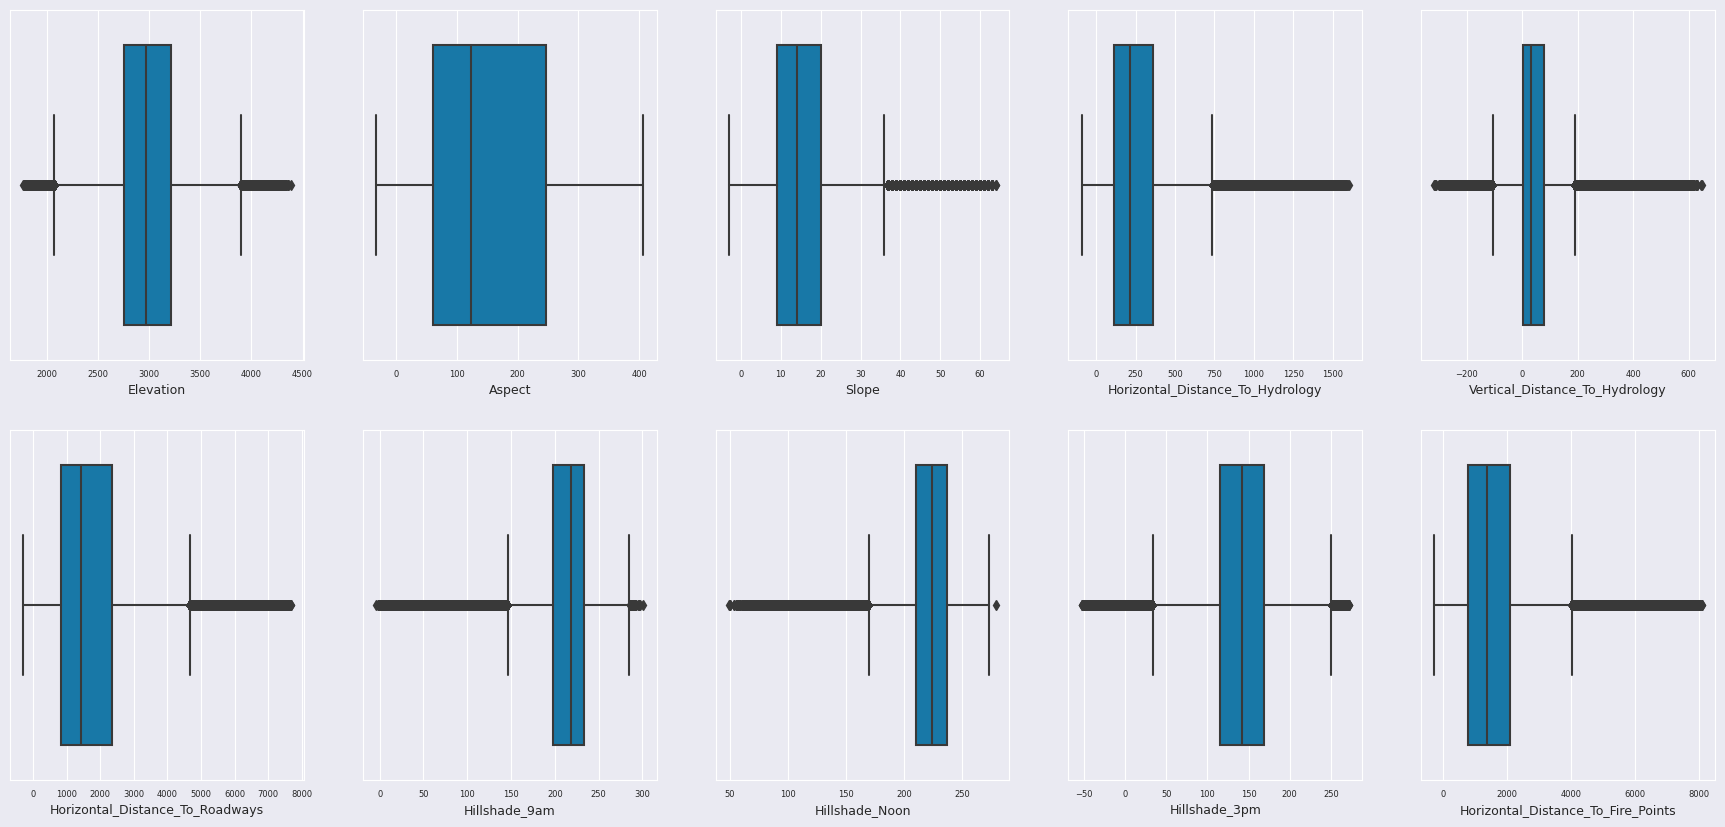

In [51]:
# boxplot for all continous features
ncols = 5
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x= train[col], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=9)
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(5)
        axes[r, c].yaxis.offsetText.set_fontsize(5)
plt.show()

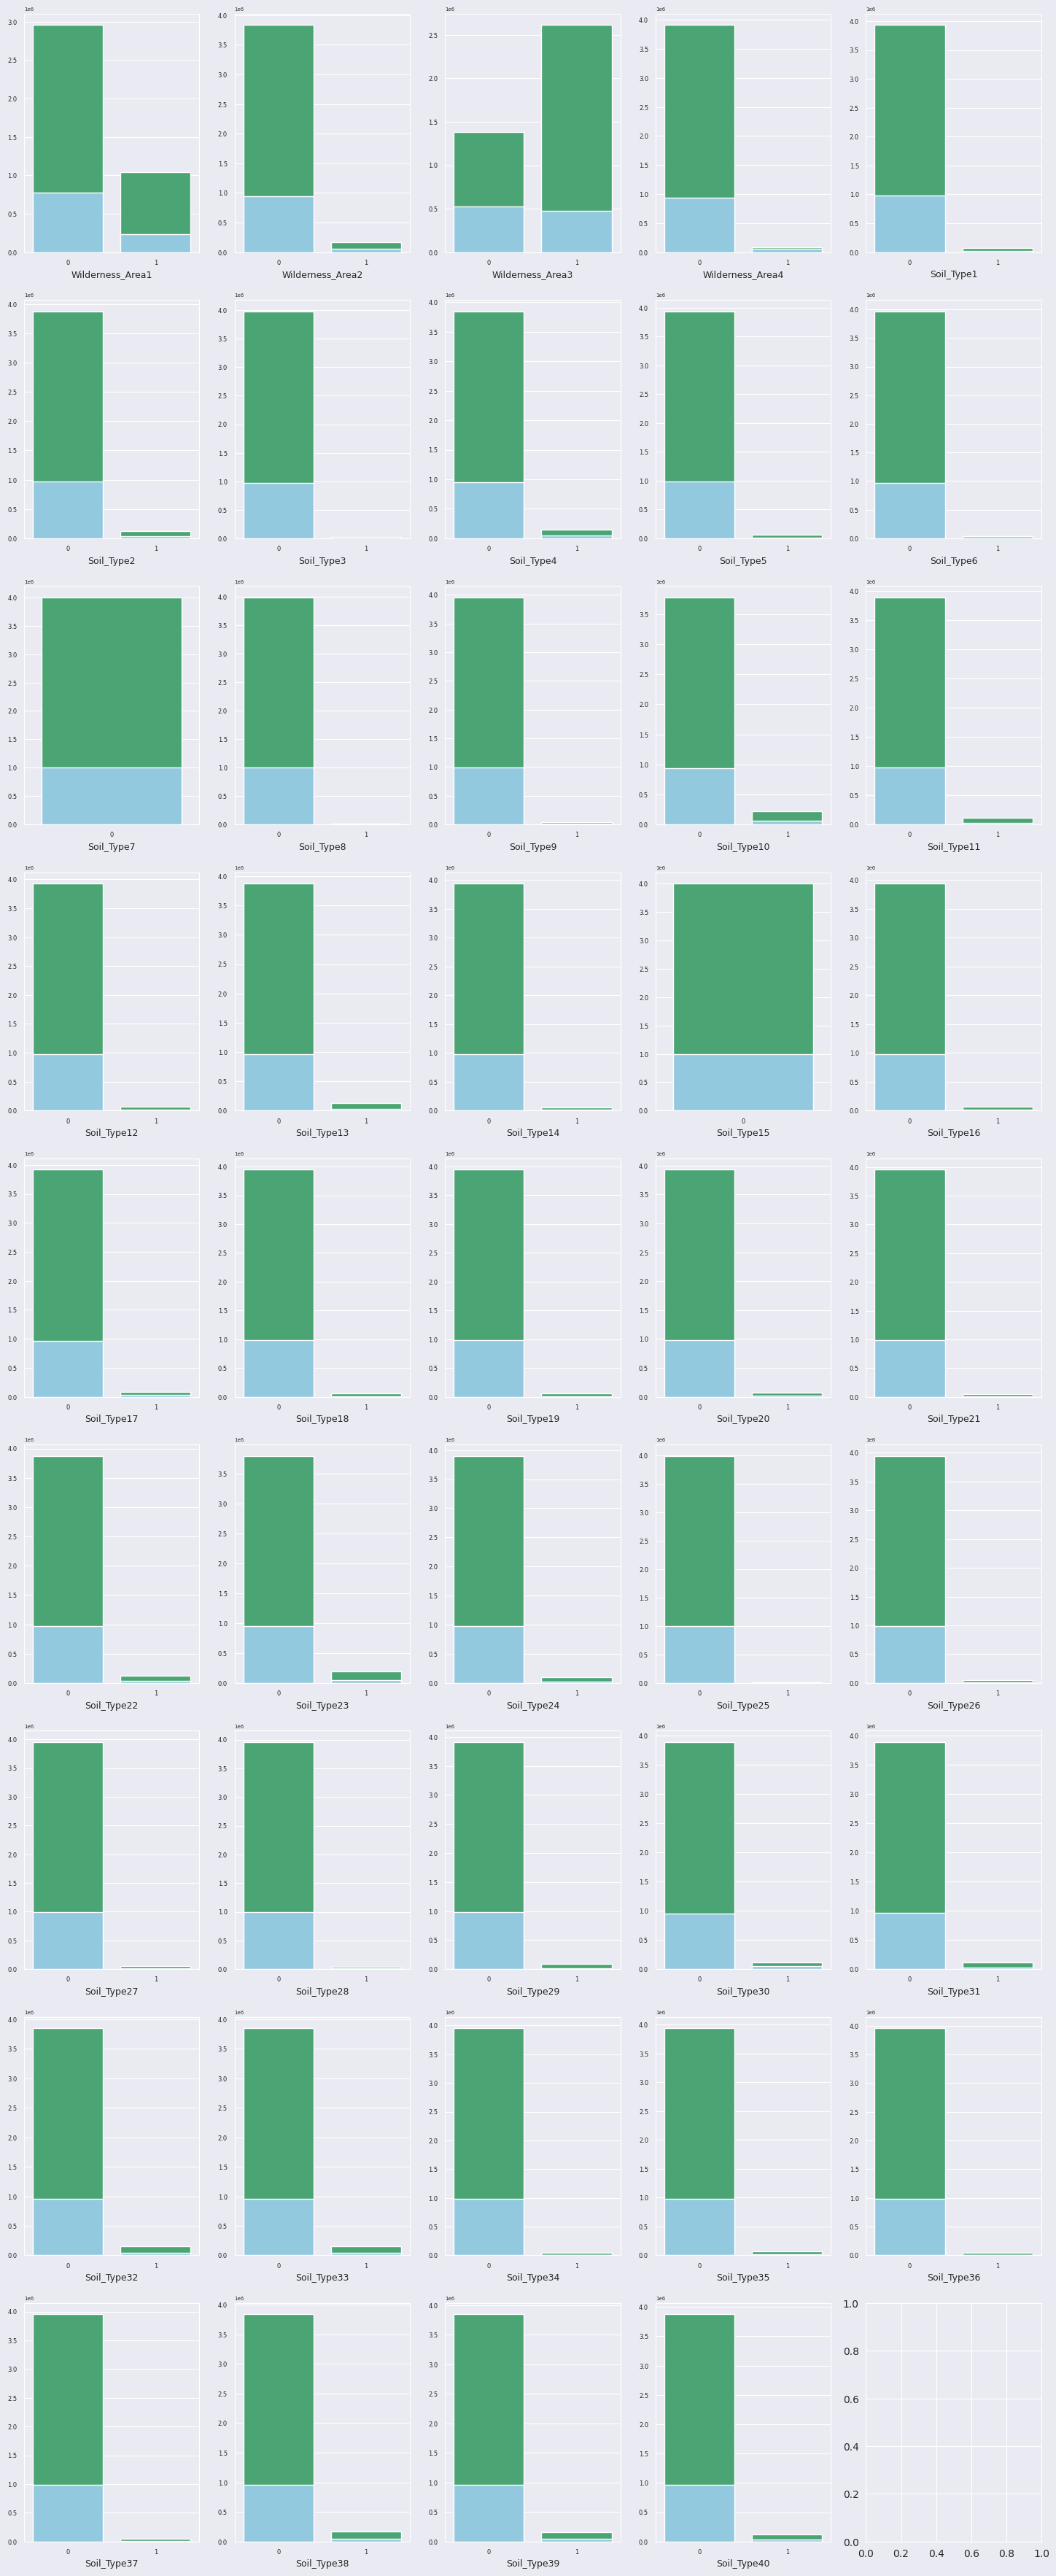

In [52]:
# countplot for all catecorigal columns
if len(cat_features) == 0:
    print("No Categorical features")
else:
    ncols = 5
    nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 45), facecolor='#EAEAF2')
    
    for r in range(nrows):
        for c in range(ncols):
            if r*ncols+c >= len(cat_features):
                break
            col = cat_features[r*ncols+c]
            sns.countplot(x=train[col], ax=axes[r, c], color='mediumseagreen', label='Train data')
            sns.countplot(x=test[col], ax=axes[r, c], color='skyblue', label='Test data')
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=9)
            axes[r, c].tick_params(labelsize=6, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(5)
            axes[r, c].yaxis.offsetText.set_fontsize(5)
    plt.show()

***Soil_type7 and Soil_Type15 are all zero values***

## Drop Unwanted columns

In [61]:
train[(train["Cover_Type"] == 5)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3403875,2953,114,39,97,111,981,181,209,184,7633,...,0,0,0,0,0,0,0,0,0,5


In [56]:
int(np.where(train["Cover_Type"] == 5 )[0])

3403875

In [62]:
train.drop(index=int(np.where(train["Cover_Type"] == 5 )[0]), inplace=True)
train.drop(["Soil_Type7" , "Soil_Type15"], axis=1, inplace=True)
FEATURES.remove('Soil_Type7')
FEATURES.remove('Soil_Type15')

In [63]:
test.drop(["Soil_Type7" , "Soil_Type15"], axis=1, inplace=True)

In [64]:
train.shape

(3999999, 53)

In [65]:
FEATURES

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

## Features Engineering

In [92]:
train[FEATURES].mean()

Elevation                             2980.191667
Aspect                                 151.585680
Slope                                   15.097531
Horizontal_Distance_To_Hydrology       271.315479
Vertical_Distance_To_Hydrology          51.662606
Horizontal_Distance_To_Roadways       1766.641826
Hillshade_9am                          211.837550
Hillshade_Noon                         221.061444
Hillshade_3pm                          140.810863
Horizontal_Distance_To_Fire_Points    1581.405297
Wilderness_Area1                         0.261193
Wilderness_Area2                         0.041661
Wilderness_Area3                         0.653573
Wilderness_Area4                         0.021819
Soil_Type1                               0.016842
Soil_Type2                               0.030896
Soil_Type3                               0.004276
Soil_Type4                               0.037913
Soil_Type5                               0.015715
Soil_Type6                               0.007973


In [93]:
train['mean'] = train[FEATURES].mean(axis=1)
train['std'] = train[FEATURES].std(axis=1)
train['min'] = train[FEATURES].min(axis=1)
train['max'] = train[FEATURES].max(axis=1)

test["mean"] = test[FEATURES].mean(axis=1)
test["std"] = test[FEATURES].std(axis=1)
test["min"] = test[FEATURES].min(axis=1)
test["max"] = test[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

In [94]:
train.shape

(3999999, 57)

In [95]:
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,mean,std,min,max
0,3189,40,8,30,13,3270,206,234,193,4873,...,0,0,0,0,0,1,231.884615,906.943383,0,4873
1,3026,182,5,280,29,3270,233,240,106,5423,...,0,0,0,0,0,2,246.076923,953.273223,0,5423
2,3106,13,7,351,37,2914,208,234,137,5269,...,0,0,0,0,0,1,236.115385,920.821748,0,5269
3,3022,276,13,192,16,3034,207,238,156,2866,...,0,0,0,0,0,2,192.730769,698.139604,0,3034
4,2906,186,13,266,22,2916,231,231,154,2642,...,0,0,0,0,0,2,184.019231,662.787059,0,2916


In [96]:
test.shape

(1000000, 56)

In [97]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,mean,std,min,max
0,2763,78,20,377,88,3104,218,213,195,1931,...,0,0,0,0,0,0,172.826923,622.011686,0,3104
1,2826,153,11,264,39,295,219,238,148,2557,...,0,0,0,0,0,0,129.826923,523.119329,0,2826
2,2948,57,19,56,44,852,202,217,163,1803,...,0,0,0,0,0,0,122.346154,485.317680,0,2948
3,2926,119,6,158,134,2136,234,240,142,857,...,0,0,0,0,0,0,133.730769,507.166218,0,2926
4,2690,10,4,38,108,3589,213,221,229,431,...,0,0,0,0,0,0,144.903846,616.295201,0,3589


## Assign Feature and Target variables

### Scaling

In [101]:
test[FEATURES].to_numpy()

array([[2763.        ,   78.        ,   20.        , ...,  622.01168645,
           0.        , 3104.        ],
       [2826.        ,  153.        ,   11.        , ...,  523.11932884,
           0.        , 2826.        ],
       [2948.        ,   57.        ,   19.        , ...,  485.31767985,
           0.        , 2948.        ],
       ...,
       [2684.        ,   51.        ,   20.        , ...,  394.56647219,
           0.        , 2684.        ],
       [3309.        ,   64.        ,   12.        , ...,  719.82372648,
           0.        , 3309.        ],
       [2543.        ,  322.        ,    7.        , ...,  508.68031243,
           0.        , 2643.        ]])

In [100]:
test[FEATURES].to_numpy().reshape(-1,1)

array([[2763.        ],
       [  78.        ],
       [  20.        ],
       ...,
       [ 508.68031243],
       [   0.        ],
       [2643.        ]])

In [105]:
scale = StandardScaler()
scale.fit_transform(test)

array([[-0.60290912, -0.66498124,  0.60027667, ...,  0.41068139,
         0.23110914, -0.2431037 ],
       [-0.41906192,  0.00688315, -0.46393045, ..., -0.24506919,
         0.23110914, -0.56750802],
       [-0.06304036, -0.85310327,  0.48203143, ..., -0.49573015,
         0.23110914, -0.42514354],
       ...,
       [-0.83344767, -0.90685242,  0.60027667, ..., -1.09749715,
         0.23110914, -0.73321095],
       [ 0.99043328, -0.79039593, -0.34568522, ...,  1.05926843,
         0.23110914, -0.00388468],
       [-1.24491521,  1.52081758, -0.93691139, ..., -0.34081363,
         0.23110914, -0.78105476]])

In [106]:
scale = StandardScaler()
scale.fit_transform(test.to_numpy())

array([[-0.60290912, -0.66498124,  0.60027667, ...,  0.41068139,
         0.23110914, -0.2431037 ],
       [-0.41906192,  0.00688315, -0.46393045, ..., -0.24506919,
         0.23110914, -0.56750802],
       [-0.06304036, -0.85310327,  0.48203143, ..., -0.49573015,
         0.23110914, -0.42514354],
       ...,
       [-0.83344767, -0.90685242,  0.60027667, ..., -1.09749715,
         0.23110914, -0.73321095],
       [ 0.99043328, -0.79039593, -0.34568522, ...,  1.05926843,
         0.23110914, -0.00388468],
       [-1.24491521,  1.52081758, -0.93691139, ..., -0.34081363,
         0.23110914, -0.78105476]])

In [109]:
scale.fit_transform(test[FEATURES].to_numpy().reshape(-1,1))

array([[ 3.61758776],
       [-0.17795493],
       [-0.25994431],
       ...,
       [ 0.43085904],
       [-0.28821651],
       [ 3.44795457]])

In [110]:
scale.transform(test[FEATURES].to_numpy().reshape(-1,1))

array([[ 3.61758776],
       [-0.17795493],
       [-0.25994431],
       ...,
       [ 0.43085904],
       [-0.28821651],
       [ 3.44795457]])

In [113]:
# Scalling the features
scale = StandardScaler()
for col in FEATURES:
    train[col] = scale.fit_transform(train[col].to_numpy().reshape(-1,1))
    test[col] = scale.fit_transform(test[col].to_numpy().reshape(-1,1))

In [114]:
test[FEATURES]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,mean,std,min,max
0,-0.602909,-0.664981,0.600277,0.494061,0.532977,1.011325,0.202692,-0.386123,1.214559,0.219114,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,0.801725,0.410681,0.231109,-0.243104
1,-0.419062,0.006883,-0.463930,-0.001615,-0.182141,-1.031701,0.234661,0.752728,0.179271,0.735520,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,-0.332331,-0.245069,0.231109,-0.567508
2,-0.063040,-0.853103,0.482031,-0.914009,-0.109170,-0.626587,-0.308810,-0.203907,0.509682,0.113523,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,-0.529624,-0.495730,0.231109,-0.425144
3,-0.127241,-0.297695,-1.055157,-0.466585,1.204312,0.307285,0.714194,0.843836,0.047107,-0.666860,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,-0.229373,-0.350854,0.231109,-0.450816
4,-0.815938,-1.274138,-1.291647,-0.992966,0.824862,1.364072,0.042848,-0.021691,1.963491,-1.018280,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,0.065299,0.372776,0.231109,0.322853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.012833,0.911661,0.009050,-0.519223,0.708108,-0.793142,0.330568,1.071607,-0.503579,0.567235,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,-0.180684,-0.235599,0.231109,-0.394804
999996,0.613984,-0.539567,0.127296,-0.751708,-0.065388,1.473897,-0.085028,-0.932772,0.047107,-1.080150,...,-0.126564,-0.103974,-0.1105,-0.212982,4.909152,-0.184089,0.340191,0.748455,0.231109,0.499059
999997,-0.833448,-0.906852,0.600277,-1.010512,1.043775,-0.546582,-0.404717,0.160525,0.113189,-1.085100,...,7.901116,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,-1.323362,-1.097497,0.231109,-0.733211
999998,0.990433,-0.790396,-0.345685,-0.299898,0.605948,0.588028,0.458443,-1.297204,-1.450757,1.348443,...,-0.126564,-0.103974,-0.1105,-0.212982,-0.203701,-0.184089,1.310935,1.059268,0.231109,-0.003885


In [115]:
test[FEATURES].to_numpy()

array([[-0.60290912, -0.66498124,  0.60027667, ...,  0.41068139,
         0.23110914, -0.2431037 ],
       [-0.41906192,  0.00688315, -0.46393045, ..., -0.24506919,
         0.23110914, -0.56750802],
       [-0.06304036, -0.85310327,  0.48203143, ..., -0.49573015,
         0.23110914, -0.42514354],
       ...,
       [-0.83344767, -0.90685242,  0.60027667, ..., -1.09749715,
         0.23110914, -0.73321095],
       [ 0.99043328, -0.79039593, -0.34568522, ...,  1.05926843,
         0.23110914, -0.00388468],
       [-1.24491521,  1.52081758, -0.93691139, ..., -0.34081363,
         0.23110914, -0.78105476]])

In [116]:
test[FEATURES].to_numpy().astype(np.float32)

array([[-0.60290915, -0.66498125,  0.60027665, ...,  0.4106814 ,
         0.23110914, -0.2431037 ],
       [-0.41906193,  0.00688315, -0.46393046, ..., -0.24506919,
         0.23110914, -0.56750804],
       [-0.06304036, -0.8531033 ,  0.48203143, ..., -0.49573016,
         0.23110914, -0.42514354],
       ...,
       [-0.8334477 , -0.9068524 ,  0.60027665, ..., -1.0974971 ,
         0.23110914, -0.733211  ],
       [ 0.9904333 , -0.7903959 , -0.3456852 , ...,  1.0592685 ,
         0.23110914, -0.00388468],
       [-1.2449152 ,  1.5208176 , -0.9369114 , ..., -0.34081364,
         0.23110914, -0.78105474]], dtype=float32)

In [117]:
# Split into X & y
X = train[FEATURES].to_numpy().astype(np.float32)
y = train['Cover_Type'].to_numpy().astype(np.float32)
X_test = test[FEATURES].to_numpy().astype(np.float32)

In [118]:
X

array([[ 0.7223998 , -1.014774  , -0.83043885, ...,  2.515001  ,
         0.21673077,  2.1103044 ],
       [ 0.15847993,  0.27659157, -1.1814506 , ...,  2.8469377 ,
         0.21673077,  2.8321002 ],
       [ 0.4352504 , -1.2603153 , -0.94744277, ...,  2.6144345 ,
         0.21673077,  2.6299973 ],
       ...,
       [-0.23937763, -0.06898511, -1.6494662 , ...,  1.5593354 ,
         0.21673077,  2.0407495 ],
       [-1.3845155 ,  0.24021508,  0.2225963 , ..., -0.17540489,
         0.21673077, -0.88318014],
       [ 0.3556789 , -0.1417381 , -1.2984545 , ..., -0.22040439,
         0.21673077, -0.23881324]], dtype=float32)

In [119]:
y

array([1., 2., 1., ..., 2., 3., 1.], dtype=float32)

#### Encoding

In [120]:
encode = LabelEncoder()

In [121]:
encode.fit_transform(y)

array([0, 1, 0, ..., 1, 2, 0])

In [122]:
to_categorical(encode.fit_transform(y))

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [123]:
y = to_categorical(encode.fit_transform(y))

### Spliting data int train and valid

In [124]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, shuffle=True, random_state=0)

# ANN

## Bulid and train ANN

In [129]:
def load_model():
    model = Sequential([
        Dense(2048, activation='swish', input_shape = [X.shape[1]]),
        Dense(1024, activation='swish'),
        Dense(512, activation='swish'),
        Dense(6, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy',
        metrics=['acc']
    )
    return model

early_stopping = callbacks.EarlyStopping( 
    patience=10,
    min_delta=0,
    monitor='val_loss',
    restore_best_weights=True,
    verbose=0,
    mode='min',
    baseline=None
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=.2,
    patience=4,
    verbose=0,
    mode='min'
)

In [130]:
nn_model = load_model()
hitory = nn_model.fit(X, y, 
                      validation_data=(X_valid, y_valid),
                     batch_size=2048,
                     epochs=1000,
                     callbacks = [early_stopping, plateau])

Epoch 1/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - acc: 0.9345 - loss: 0.1708 - val_acc: 0.9556 - val_loss: 0.1006 - learning_rate: 0.0010
Epoch 2/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9567 - loss: 0.0968 - val_acc: 0.9589 - val_loss: 0.0902 - learning_rate: 0.0010
Epoch 3/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9583 - loss: 0.0910 - val_acc: 0.9594 - val_loss: 0.0880 - learning_rate: 0.0010
Epoch 4/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9596 - loss: 0.0872 - val_acc: 0.9597 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 5/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9601 - loss: 0.0849 - val_acc: 0.9609 - val_loss: 0.0831 - learning_rate: 0.0010
Epoch 6/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9608 - loss: 0.0829 - val_acc: 0.9609 - val_loss: 0.0824 - learning_rate: 0.0010
Epoch 7/1000
1954/1954 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9611 - loss: 0.0814 - val_acc: 0.9620 - val_loss: 0.

### Loss Curve

In [132]:
len(hitory.history['loss'])

227

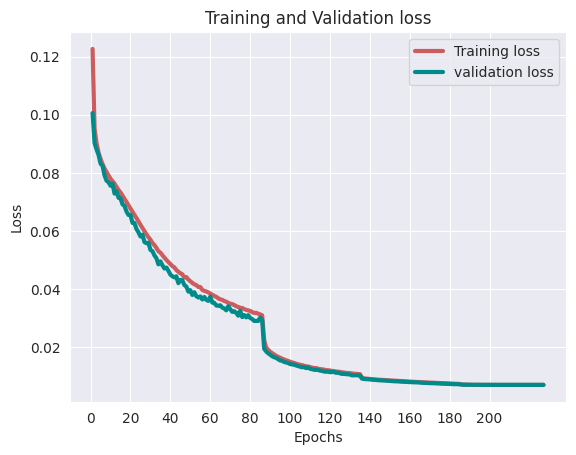

In [144]:
loss_train = hitory.history['loss']
loss_val = hitory.history['val_loss']
epochs = [i+1 for i in range(len(loss_train))]
plt.plot(epochs, loss_train, 'indianred', label='Training loss', lw=3)
plt.plot(epochs, loss_val, 'darkcyan', label='validation loss', lw=3)
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,220, 20))
plt.legend()
plt.show()

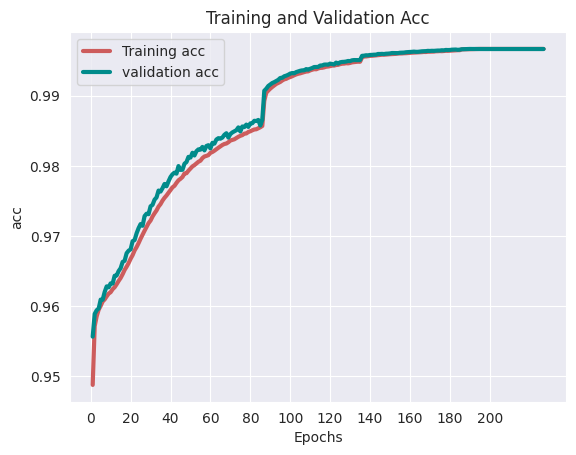

In [145]:
loss_train = hitory.history['acc']
loss_val = hitory.history['val_acc']
epochs = [i+1 for i in range(len(loss_val))]
plt.plot(epochs, loss_train, 'indianred', label='Training acc', lw=3)
plt.plot(epochs, loss_val, 'darkcyan', label='validation acc', lw=3)
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.xticks(np.arange(0,220, 20))
plt.legend()
plt.show()

In [146]:
y_pred = nn_model.predict(X_valid)
y_pred

37500/37500 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


array([[1.0000000e+00, 2.5237725e-22, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [147]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [148]:
y_pred_labels

[0,
 1,
 0,
 0,
 5,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 5,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 0,
 1,
 1,
 1,
 0,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 1,


In [149]:
y_pred_labels = np.array(y_pred_labels)
y_pred_labels.shape

(1200000,)

In [151]:
y_valid.shape

(1200000, 6)

In [152]:
y = np.argmax(y, axis=-1)

In [154]:
y.shape

(3999999,)

In [156]:
X_train , X_valid ,y_train ,y_valid  = train_test_split(X,y , test_size = 0.3 , random_state=0)

In [157]:
y_valid.shape

(1200000,)

In [158]:
confusion_matrix(y_valid, y_pred_labels)

array([[440579,    113,      0,      0,      0,     21],
       [    95, 676263,   2170,      0,     27,      0],
       [     0,   1479,  57004,      0,     10,      0],
       [     0,      0,      0,    113,      0,      0],
       [     0,     28,     11,      0,   3415,      0],
       [    40,      1,      0,      0,      0,  18631]])

In [159]:
tf.math.confusion_matrix(labels=y_valid, predictions=y_pred_labels)

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[440579,    113,      0,      0,      0,     21],
       [    95, 676263,   2170,      0,     27,      0],
       [     0,   1479,  57004,      0,     10,      0],
       [     0,      0,      0,    113,      0,      0],
       [     0,     28,     11,      0,   3415,      0],
       [    40,      1,      0,      0,      0,  18631]], dtype=int32)>

In [160]:
cm = tf.math.confusion_matrix(labels=y_valid, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[440579,    113,      0,      0,      0,     21],
       [    95, 676263,   2170,      0,     27,      0],
       [     0,   1479,  57004,      0,     10,      0],
       [     0,      0,      0,    113,      0,      0],
       [     0,     28,     11,      0,   3415,      0],
       [    40,      1,      0,      0,      0,  18631]], dtype=int32)>

## Confusion Matrix

<Axes: >

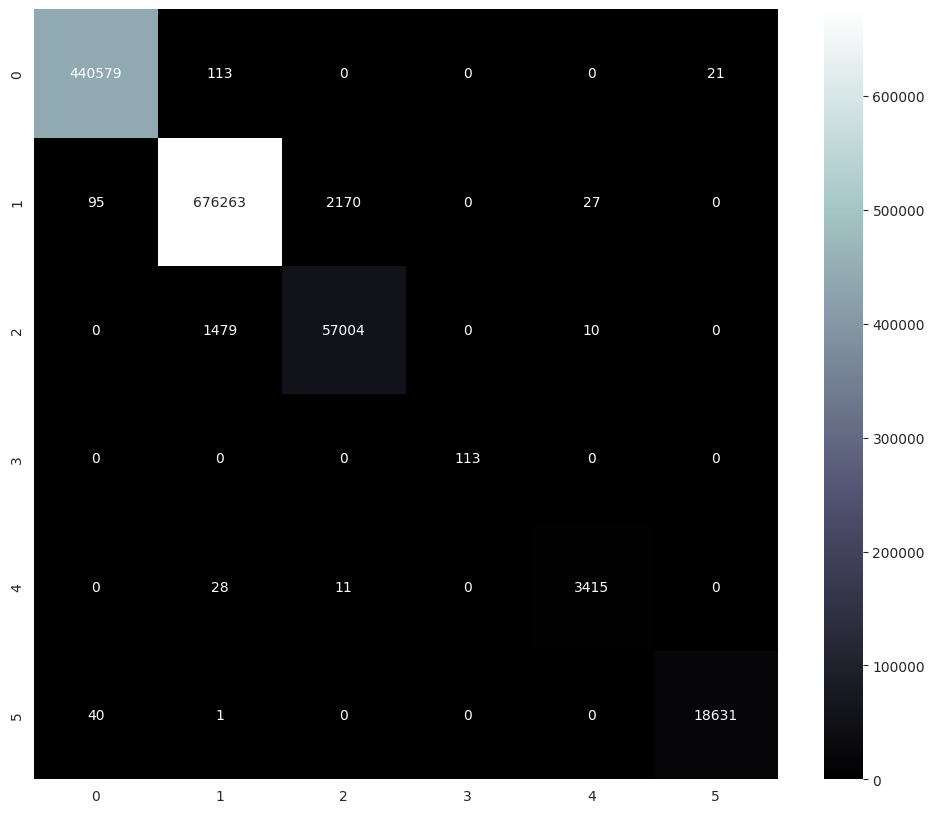

In [235]:
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='bone')  # fmt= 'd' mean make number integer

## Classification Report

In [176]:
print(classification_report(y_valid, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    440713
           1       1.00      1.00      1.00    678555
           2       0.96      0.97      0.97     58493
           3       1.00      1.00      1.00       113
           4       0.99      0.99      0.99      3454
           5       1.00      1.00      1.00     18672

    accuracy                           1.00   1200000
   macro avg       0.99      0.99      0.99   1200000
weighted avg       1.00      1.00      1.00   1200000



# Sumbission

In [233]:
test.shape

(1000000, 56)

In [234]:
nn_preds = nn_model.predict(test)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step


In [236]:
submission = pd.read_csv("/kaggle/input/tabular-playground-series-dec-2021/sample_submission.csv")
nn_submission = submission.copy()
nn_submission["Cover_Type"] = encode.inverse_transform(np.argmax((nn_preds), axis=1)).astype(int)   # make LabelEncoder()
nn_submission.to_csv("nn-sub.csv" , index= False)
nn_submission.head()

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
